<a href="https://colab.research.google.com/github/gkothari25/fashion_mnist_classification/blob/main/capgemini_assign_with_dense_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
x_train = x_train/255.0
x_test = x_test/255.0

In [3]:
#select the 5k images having 500 each class
import numpy as np
import random

index_dict = {}
count_index = 0
val_dict = {}
count_val = 0

#create a tensor and copy the desired data from the all the data files to that.
train_t = np.ones((5000,28,28))
lable_train = []
val_t = np.ones((1500,28,28))
lable_val = []

for k in list(set(y_train)):
  index_list = []
  
  for sn,i in enumerate(zip(x_train,y_train)):
    if int(i[1]) == k:
      index_list.append(sn) 
  index_dict[k] = index_list

  #select the n random value from the list
  random.seed(4)
  t_list = random.sample(index_list,k=500)
  resid_list = list(set(index_list).difference(t_list))
  val_list = random.sample(resid_list,k=150)
  val_dict[k] = val_list
  
  for index in t_list:
    train_t[count_index] = x_train[index]
    lable_train.append(k)
    count_index  = count_index + 1
  print("tr",t_list[:10])

  for val in val_list:
    val_t[count_val] = x_train[val]
    lable_val.append(k)
    count_val = count_val + 1
  print("val",val_list[:10])


tr [19956, 25226, 9027, 59117, 32905, 39573, 13359, 7939, 5838, 1647]
val [25602, 2938, 50981, 29489, 40924, 32831, 29251, 36328, 44096, 25535]
tr [19119, 24566, 7891, 59137, 32384, 39255, 12464, 6885, 4928, 1548]
val [42072, 52030, 34546, 29413, 24454, 49221, 12767, 3462, 11358, 9256]
tr [19487, 24888, 8347, 59142, 32726, 39833, 12635, 7347, 5371, 1641]
val [42134, 19279, 34581, 29434, 24556, 45, 29219, 19860, 11450, 25667]
tr [19207, 24547, 8352, 58942, 32011, 38931, 12695, 7239, 5344, 1667]
val [42118, 2923, 18286, 13161, 24589, 16433, 29306, 19870, 44228, 58422]
tr [19661, 25063, 8705, 59195, 32914, 39665, 12832, 7773, 5557, 1717]
val [9235, 35714, 1934, 12911, 24600, 16438, 12686, 36304, 11149, 9162]
tr [19072, 24820, 8551, 59121, 32162, 39051, 12607, 7404, 5541, 1575]
val [42086, 19196, 1769, 45838, 57323, 16420, 12838, 36196, 27779, 42040]
tr [18883, 24064, 8310, 58928, 31587, 38545, 12173, 7385, 5532, 1687]
val [25674, 2985, 50989, 29317, 8144, 55, 45448, 52679, 27748, 25609]
t

In [4]:
#now lets create a network for the classification with 5 CNN layers.
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers
from keras.regularizers import l2


In [21]:
import tensorflow as tf
from tensorflow.keras import layers

model = Sequential()
model.add(Dense(128, activation='elu', input_shape=(28,28,1)))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(128,activation='elu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(128,activation='elu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(128,activation='elu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 28, 28, 128)       256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
dense_31 (Dense)             (None, 28, 28, 128)       16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
dense_32 (Dense)             (None, 28, 28, 128)       16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
dense_33 (Dense)             (None, 28, 28, 128)      

In [22]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
epochs=60

# train_data   = np.expand_dims(train_t, axis=1)
train_data =    train_t.reshape(train_t.shape[0],28,28,1)
train_lables = np.array(lable_train)
one_hot_label_train = to_categorical(train_lables)

# val_data = np.expand_dims(val_t, axis=1)
val_data = val_t.reshape(val_t.shape[0],28,28,1)
val_lables = np.array(lable_val)
one_hot_label_val = to_categorical(val_lables)

train_data_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

train_generator = train_data_gen.flow(train_data, one_hot_label_train, batch_size=batch_size)
test_generator = test_gen.flow(val_data, one_hot_label_val, batch_size=batch_size)

In [24]:
# validation_data = train_data
# validation_labels = y_val1

history = model.fit(train_generator,
              batch_size = batch_size,
              epochs = epochs,
              validation_data = test_generator
              )
model.save_weights('only_dense_weight.h5')

Epoch 1/60
40/40 [==============================] - 66s 2s/step - loss: 1.0486 - accuracy: 0.6212 - val_loss: 0.6999 - val_accuracy: 0.7473
Epoch 2/60
40/40 [==============================] - 65s 2s/step - loss: 0.8042 - accuracy: 0.7134 - val_loss: 0.6864 - val_accuracy: 0.7560
Epoch 3/60
40/40 [==============================] - 65s 2s/step - loss: 0.7656 - accuracy: 0.7158 - val_loss: 0.6457 - val_accuracy: 0.7747
Epoch 4/60
40/40 [==============================] - 65s 2s/step - loss: 0.7626 - accuracy: 0.7112 - val_loss: 0.6490 - val_accuracy: 0.7553
Epoch 5/60
40/40 [==============================] - 65s 2s/step - loss: 0.7548 - accuracy: 0.7196 - val_loss: 0.6687 - val_accuracy: 0.7693
Epoch 6/60
40/40 [==============================] - 65s 2s/step - loss: 0.7959 - accuracy: 0.7032 - val_loss: 0.6877 - val_accuracy: 0.7540
Epoch 7/60
40/40 [==============================] - 65s 2s/step - loss: 0.7754 - accuracy: 0.7172 - val_loss: 0.6213 - val_accuracy: 0.7760
Epoch 8/60
40/40 [==

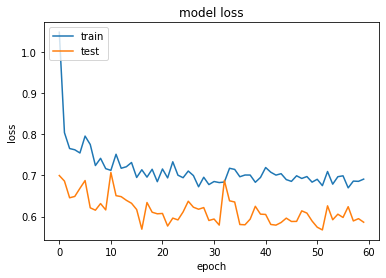

In [25]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

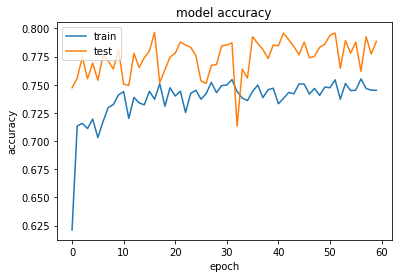

In [26]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
x_test1 = x_test.reshape(x_test.shape[0],28,28,1)

one_hot_label_test = to_categorical(y_test)

test_loss, test_acc = model.evaluate(x_test1,  one_hot_label_test, verbose=2)

print(test_loss,test_acc)

313/313 - 32s - loss: 0.6174 - accuracy: 0.7692
0.6173680424690247 0.7692000269889832


In [28]:
#weight printing 
for layer in model.layers: print(layer.get_config(), layer.get_weights())

{'name': 'dense_30', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'units': 128, 'activation': 'elu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 4.78429794e-02,  5.59800155e-02, -1.70974880e-02,
         6.34380104e-03, -8.85788724e-03, -2.77127232e-02,
        -9.81187820e-03, -8.59247446e-02, -9.47398692e-02,
        -6.99707195e-02, -4.33409470e-04,  8.75833258e-02,
        -7.32018799e-02,  5.21836691e-02, -2.77764094e-03,
        -3.56044085e-03,  4.15167920e-02, -2.58800425e-02,
        -1.11809678e-01,  1.53746281e-03, -4.41069826e-02,
         2.93591470e-02,  1.78402271e-02,  3.76401586e-03,
        -1.96398422e-01,  1.14504956e-01, -4.33747005e-03,
        -2.28716992e-03, -1.17660433e-0